In [1]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
from cartopy.feature.nightshade import Nightshade
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os, glob, sys, gc
import tqdm.auto as tqdm
import pandas as pd

/glade/work/abukowski/conda-envs/SAMI3-GITM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import argparse
import glob
import os
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

import numpy as np
import xarray as xr

import importlib

In [3]:
os.chdir('SAMI3-GITM-python/')

In [4]:
import utility_programs.filters as filters
from utility_programs.plotting_routines import panel_plot
from utility_programs.read_routines.GITM import auto_read as auto_read_gitm
from utility_programs.read_routines.GITM import gitm_times_from_filelist
from utility_programs.read_routines.SAMI import auto_read as auto_read_sami
from utility_programs import plotting_routines
from utility_programs.utils import ut_to_lt

/glade/u/home/abukowski/SAMI3-GITM-python/utility_programs/plotting_routines.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


In [1]:
ls /glade/u/home/abukowski/scratch/postprocessed/

may_full_ut12_storm-1hr_GITM.nc
may_full_ut12_storm-on_GITM.nc
may_full_ut12_storm-on_SAMI_REGRID.nc
may_full_ut18_storm-on_GITM.nc
may_full_ut18_storm-on_SAMI_REGRID.nc
may_full_ut6_storm-1hr_GITM.nc
may_full_ut6_storm-on_GITM.nc
may_full_ut6_storm-on_SAMI_REGRID.nc
may_half_ut12_storm-1hr_GITM.nc
may_half_ut12_storm-on_GITM.nc
may_half_ut12_storm-on_SAMI_REGRID.nc
may_quarter_ut12_storm-on_GITM.nc
may_quarter_ut12_storm-on_SAMI_REGRID.nc
may_ut12_full_thm_GITM.nc
nov_full_ut12_storm-on_GITM.nc
nov_full_ut12_storm-on_SAMI_REGRID.nc
nov_full_ut18_storm-on_GITM.nc
nov_full_ut18_storm-on_SAMI_REGRID.nc
nov_full_ut6_storm-on_GITM.nc
nov_full_ut6_storm-on_SAMI_REGRID.nc
nov_half_ut12_storm-on_GITM.nc
nov_half_ut12_storm-on_SAMI_REGRID.nc
nov_rotB-bz15-byneg_ut12_storm-on_GITM.nc
nov_rotB-bz15-byneg_ut12_storm-on_SAMI_REGRID.nc
nov_rotB-bz15-bypos_ut12_storm-on_GITM.nc
nov_rotB-bz15-bypos_ut12_storm-on_SAMI_REGRID.nc
nov_rotB-bz17_ut12_storm-on_GITM.nc
nov_rotB-bz17_ut12_storm-on_SAMI_REGRI

# Read in all Rot B Datasets:

In [152]:
gitms = {}
samis = {}

for file in np.sort(glob.glob('/glade/u/home/abukowski/scratch/postprocessed/*')):
    if 'rotB' not in file and '12' in file and '1hr' not in file and 'tmp' not in file:
        relevant = file[file.rfind('/')+1:]
        month = relevant.split('_')[0]
        amp = relevant.split('_')[1]
        
        if 'GITM' in file:
            gitms['-'.join([month, amp])] = xr.open_mfdataset(file)
        elif 'SAMI' in file:
            samis['-'.join([month, amp])] = xr.open_mfdataset(file)
        else:
            print('file %s error' %file)
  
        print(month, amp, file)
        


may full /glade/u/home/abukowski/scratch/postprocessed/may_full_ut12_storm-on_GITM.nc
may full /glade/u/home/abukowski/scratch/postprocessed/may_full_ut12_storm-on_SAMI_REGRID.nc
may half /glade/u/home/abukowski/scratch/postprocessed/may_half_ut12_storm-on_GITM.nc
may half /glade/u/home/abukowski/scratch/postprocessed/may_half_ut12_storm-on_SAMI_REGRID.nc
may quarter /glade/u/home/abukowski/scratch/postprocessed/may_quarter_ut12_storm-on_GITM.nc
may quarter /glade/u/home/abukowski/scratch/postprocessed/may_quarter_ut12_storm-on_SAMI_REGRID.nc
nov full /glade/u/home/abukowski/scratch/postprocessed/nov_full_ut12_storm-on_GITM.nc
nov full /glade/u/home/abukowski/scratch/postprocessed/nov_full_ut12_storm-on_SAMI_REGRID.nc
nov half /glade/u/home/abukowski/scratch/postprocessed/nov_half_ut12_storm-on_GITM.nc
nov half /glade/u/home/abukowski/scratch/postprocessed/nov_half_ut12_storm-on_SAMI_REGRID.nc


In [17]:
gitms['nov-full'].sel(time='2011-11-21 13:30', method='nearest')

<xarray.Dataset>
Dimensions:                          (lon: 90, lat: 180, alt: 50)
Coordinates:
    time                             datetime64[ns] 2011-11-21T13:30:00.451000
  * lon                              (lon) float64 2.0 6.0 10.0 ... 354.0 358.0
  * lat                              (lat) float64 -89.5 -88.5 ... 88.5 89.5
  * alt                              (alt) float64 100.0 101.7 ... 733.9 756.6
Data variables: (12/49)
    LocalTime                        (lon, lat) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    SolarZenithAngle                 (lon, lat) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    VerticalTEC                      (lon, lat) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    AltIntJouleHeating_W_m2          (lon, lat) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    AltIntHeatingTransfer_W_m2       (lon, lat) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    AltIntEuvHeating_W_m2            (lon, lat) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    ...                               ...
    e_                               (lon, lat, alt) float64 dask.array<chunksize=(90, 180, 50), meta=np.ndarray>
    eTemperature                     (lon, lat, alt) float64 dask.array<chunksize=(90, 180, 50), meta=np.ndarray>
    iTemperature                     (lon, lat, alt) float64 dask.array<chunksize=(90, 180, 50), meta=np.ndarray>
    Vi_east                          (lon, lat, alt) float64 dask.array<chunksize=(90, 180, 50), meta=np.ndarray>
    Vi_north                         (lon, lat, alt) float64 dask.array<chunksize=(90, 180, 50), meta=np.ndarray>
    Vi_up                            (lon, lat, alt) float64 dask.array<chunksize=(90, 180, 50), meta=np.ndarray>
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True

In [31]:
np.argmin(np.abs(pd.Timestamp('2011-11-21 13:30').to_numpy() - gitms['nov-full'].time.values))

450

In [33]:
gitms['may-full'].time[450]

<xarray.DataArray 'time' ()>
array('2011-05-21T13:30:00.404000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2011-05-21T13:30:00.404000

# Amplitude First, Look at May and Nov Together.

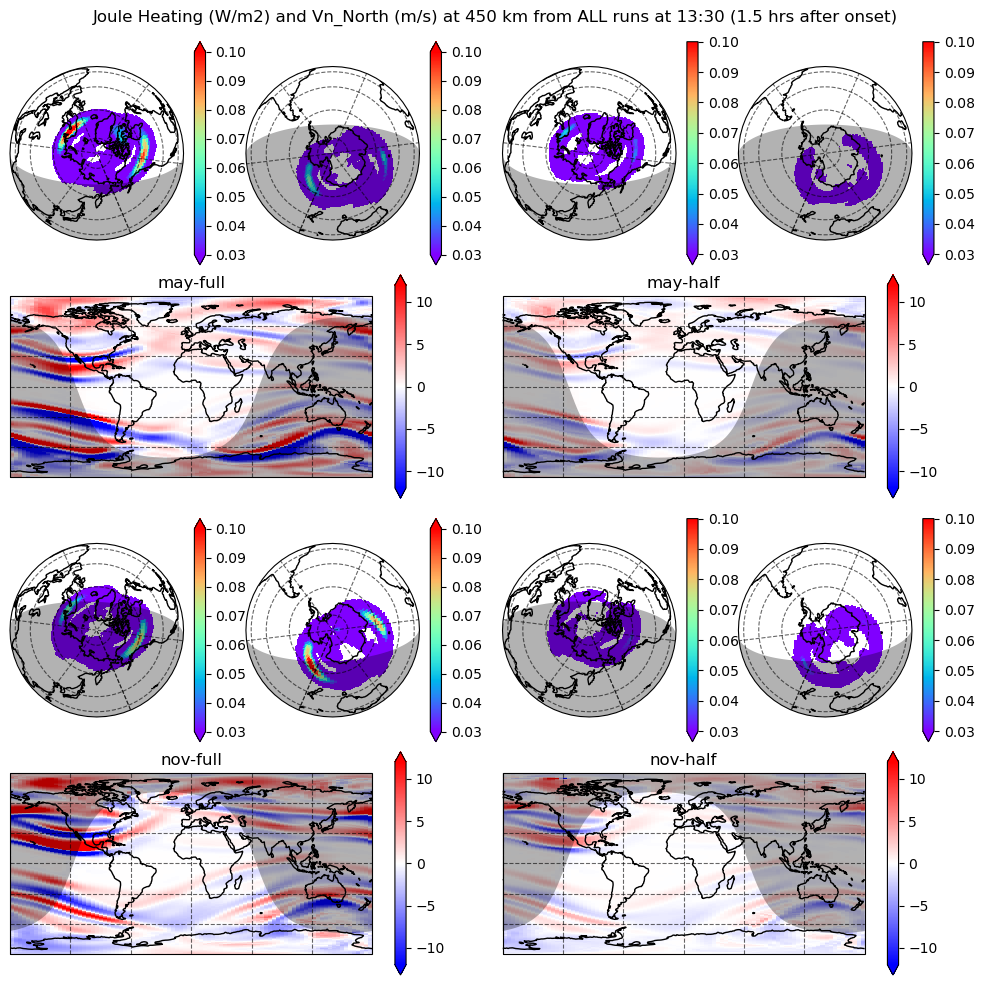

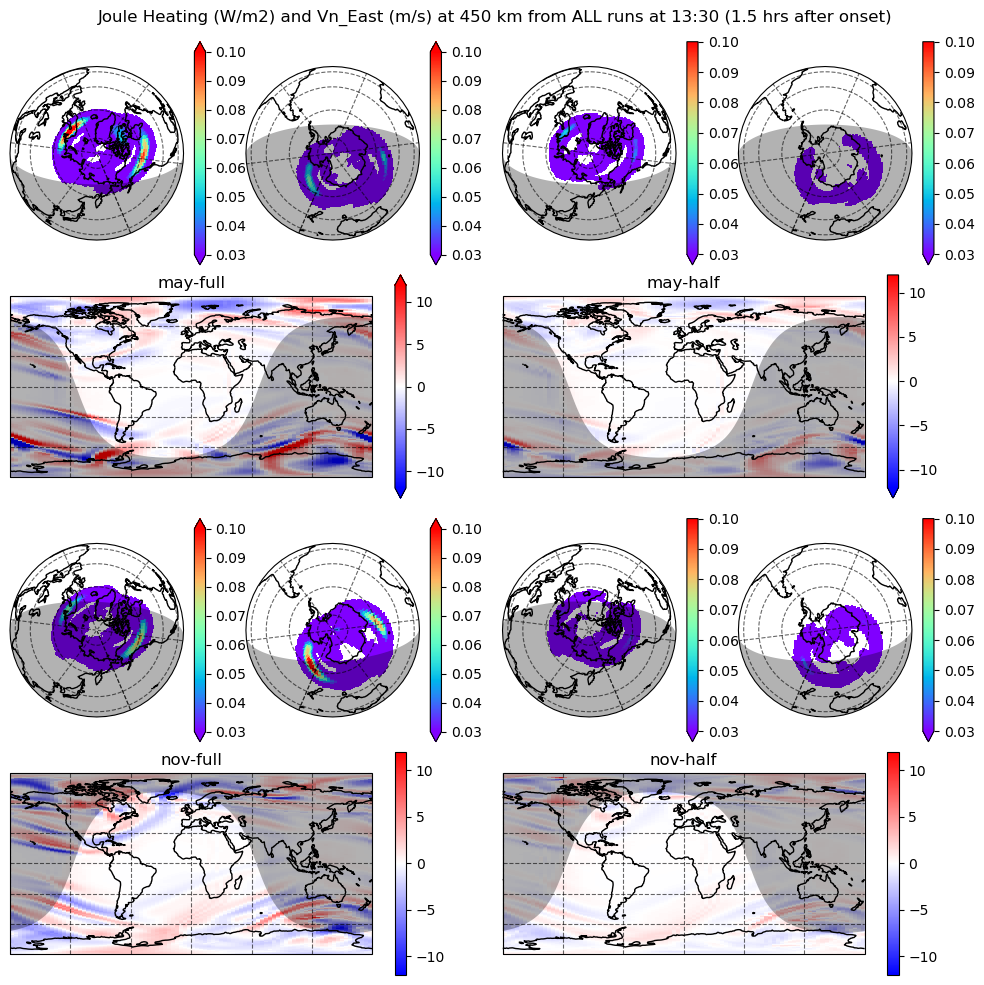

In [53]:
itime = 450
a = 450
times = []


map_data = xr.Dataset()
dial_data = xr.Dataset()
titles = []

for k in gitms.keys():
    dial_data[k] = gitms[k].AltIntJouleHeating_W_m2.isel(time=itime)#.reindex_like(gitms['may-full'], fill_value=19)
    map_data[k] = filters.filter_xarray_DA_diff(
        gitms[k].Vn_north.sel(alt=a, method='nearest'), percent=False, label='lower', order=2).isel(time=itime)#.reindex_like(gitms['may-full'], fill_value=19)
    times.append(gitms[k].time.values[itime])
    
    

fig = plotting_routines.map_and_dials(dial_da=dial_data,
                                        total=4,
                                        map_da=map_data,
                                        max_per_row=2, mask_dials=0.002,
                                        suptitle='Joule Heating (W/m2) and Vn_North (m/s) at %i km from ALL runs at 13:30 (1.5 hrs after onset)' %(a),
                                        map_cmap='bwr', vmin_dial=0.03, vmax_dial=.10, vmin_map=-12, vmax_map=12,
                                      several_datasets=True, times_datasets=times)
    
plt.show()
plt.close()





map_data = xr.Dataset()
dial_data = xr.Dataset()
titles = []

for k in gitms.keys():
    dial_data[k] = gitms[k].AltIntJouleHeating_W_m2.isel(time=itime)
    map_data[k] = filters.filter_xarray_DA_diff(
        gitms[k].Vn_east.sel(alt=a, method='nearest'), percent=False, label='lower', order=2).isel(time=itime)
    times.append(gitms[k].time.values[itime])
    

fig = plotting_routines.map_and_dials(dial_da=dial_data,
                                        total=4,
                                        map_da=map_data,
                                        max_per_row=2, mask_dials=0.002,
                                        suptitle='Joule Heating (W/m2) and Vn_East (m/s) at %i km from ALL runs at 13:30 (1.5 hrs after onset)' %(a),
                                        map_cmap='bwr', vmin_dial=0.03, vmax_dial=.10, vmin_map=-12, vmax_map=12, 
                                      several_datasets=True, times_datasets=times)
    
plt.show()
plt.close()

In [153]:
gitms.keys()

dict_keys(['may-full', 'may-half', 'may-quarter', 'nov-full', 'nov-half'])

In [154]:
mays = [k for k in gitms.keys() if 'may' in k]
mays

['may-full', 'may-half', 'may-quarter']

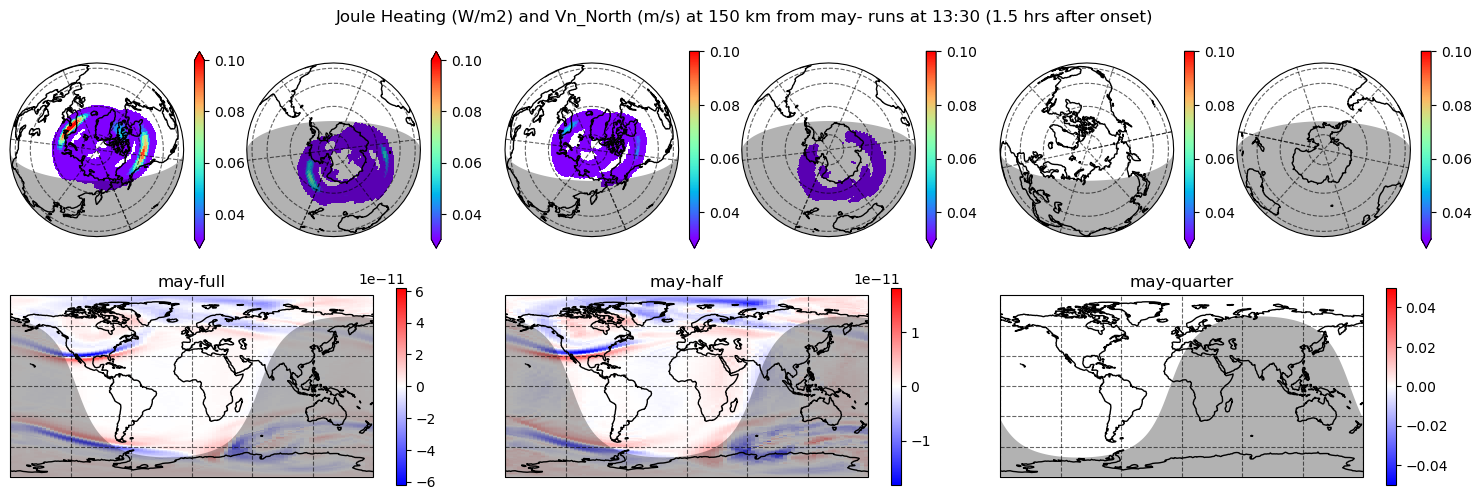

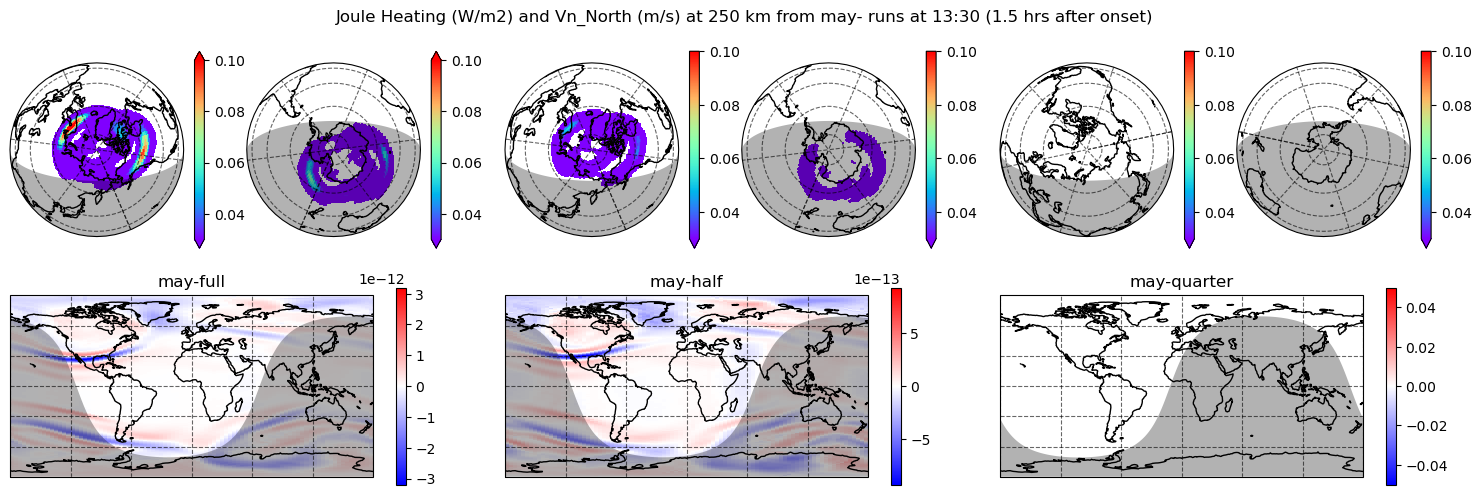

KeyboardInterrupt: 

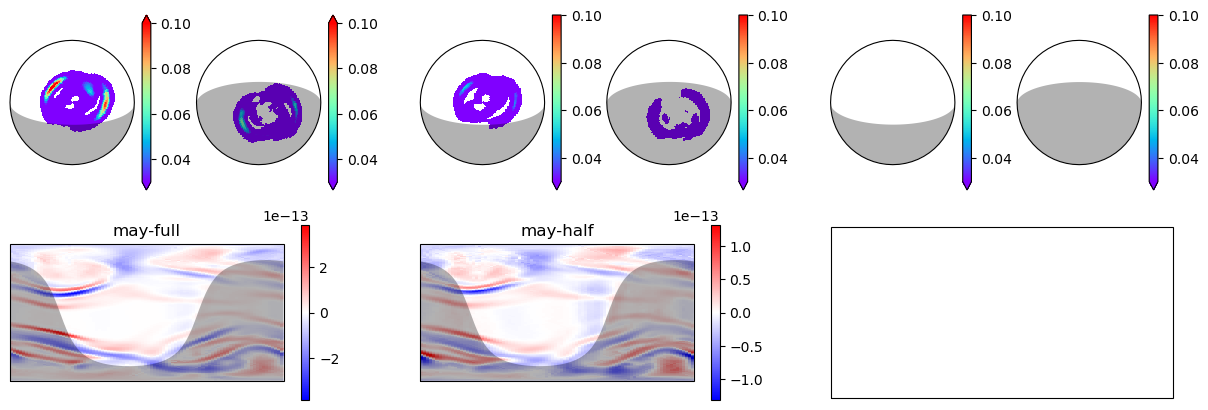

In [161]:
itime = 450
alts = [150, 250, 350, 450, 650]
times = []

mays = [k for k in gitms.keys() if 'may' in k]
novs = [k for k in gitms.keys() if 'nov' in k]

month_plots = [mays, novs]


for a in alts:
    for month in month_plots:
        map_data = xr.Dataset()
        dial_data = xr.Dataset()
        titles = []

        for k in month:
            dial_data[k] = gitms[k].AltIntJouleHeating_W_m2.isel(time=itime)#.reindex_like(gitms['may-full'], fill_value=19)
            map_data[k] = filters.filter_xarray_DA_diff(
                gitms[k].Rho.sel(alt=a, method='nearest'), percent=False, label='lower', order=2).isel(time=itime)#.reindex_like(gitms['may-full'], fill_value=19)
            times.append(gitms[k].time.values[itime])



        fig = plotting_routines.map_and_dials(dial_da=dial_data,
                                                total=len(month),
                                                map_da=map_data,
                                                max_per_row=len(month), mask_dials=0.002,
                                                suptitle='Joule Heating (W/m2) and Vn_North (m/s) at %i km from %s runs at 13:30 (1.5 hrs after onset)' %(a, month[0][:4]),
                                                map_cmap='bwr', vmin_dial=0.03, vmax_dial=.10,
                                              vmin_map=None, vmax_map=None,
                                              several_datasets=True, times_datasets=times)

        plt.show()
        plt.close()
        break
    break

In [163]:
gitms['may-full'].lon

<xarray.DataArray 'lon' (lon: 90)>
array([  2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,  42.,  46.,
        50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,  86.,  90.,  94.,
        98., 102., 106., 110., 114., 118., 122., 126., 130., 134., 138., 142.,
       146., 150., 154., 158., 162., 166., 170., 174., 178., 182., 186., 190.,
       194., 198., 202., 206., 210., 214., 218., 222., 226., 230., 234., 238.,
       242., 246., 250., 254., 258., 262., 266., 270., 274., 278., 282., 286.,
       290., 294., 298., 302., 306., 310., 314., 318., 322., 326., 330., 334.,
       338., 342., 346., 350., 354., 358.])
Coordinates:
  * lon      (lon) float64 2.0 6.0 10.0 14.0 18.0 ... 346.0 350.0 354.0 358.0

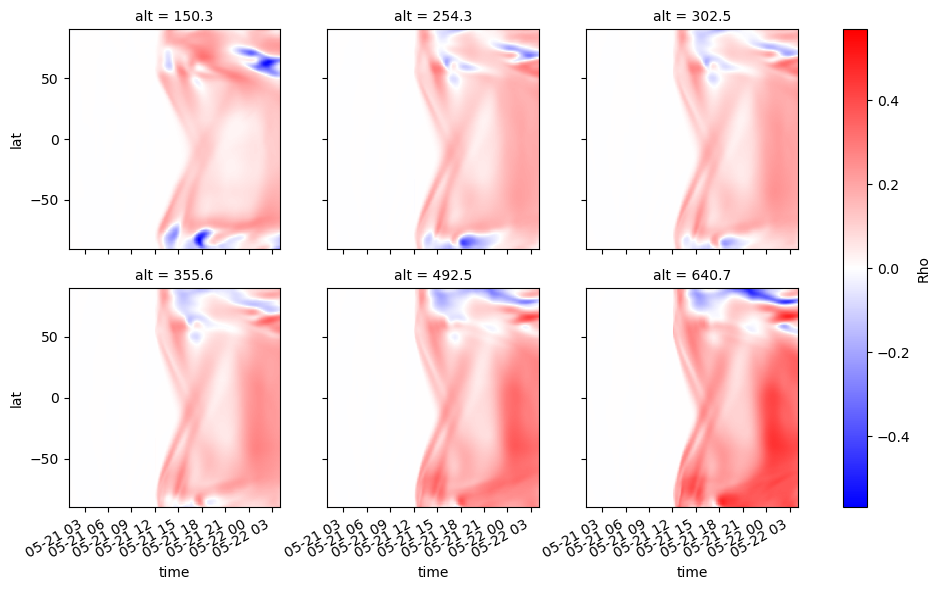

In [182]:
plotting_routines.panel_plot(
    ((gitms['may-full'] - gitms['may-half'].reindex_like(
        gitms['may-full'], method='nearest')) \
        / gitms['may-full']).Rho.sel(lon=298.).isel(time=slice(300,9999)),
    wrap_col='alt',
    plot_vals=[150, 250, 300, 350, 500, 650],
    col_wrap=3,
    vlims=None)

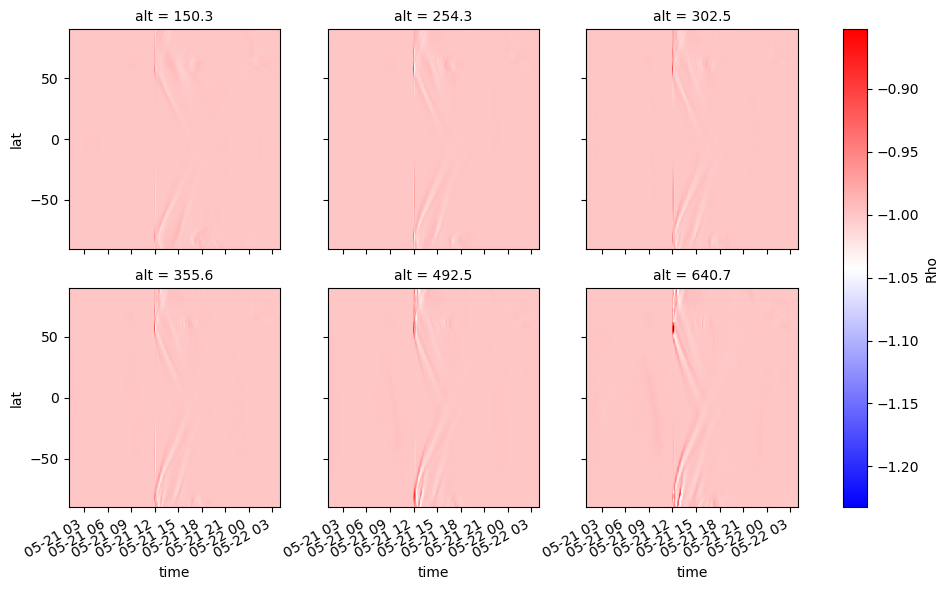

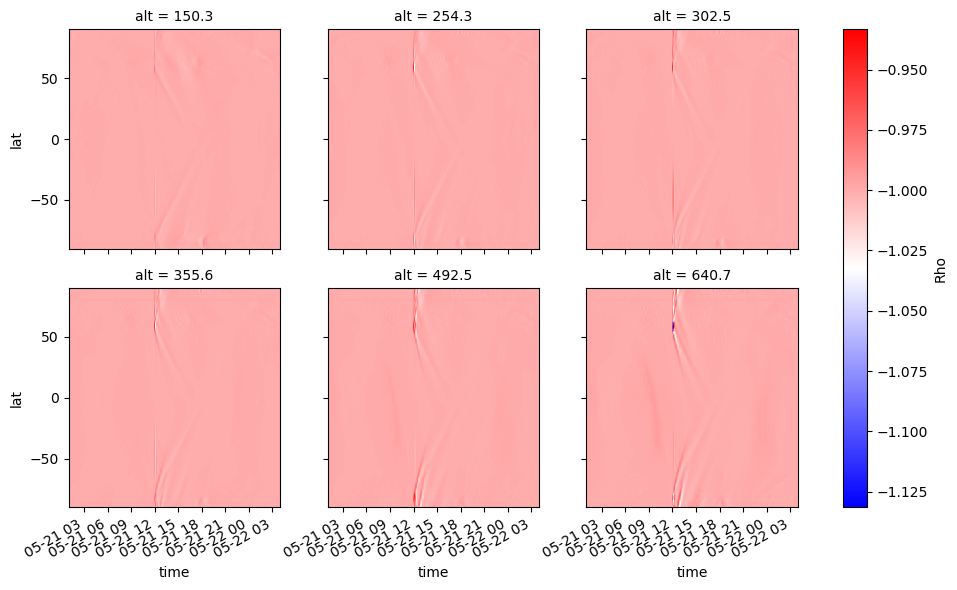

In [186]:
plotting_routines.panel_plot(
    ((filters.filter_xarray_DA_diff(gitms['may-full'].Rho.sel(lon=298.), percent=False, label='lower', order=2)
      - gitms['may-full'].Rho.sel(lon=298.)) \
        / gitms['may-full'].Rho.sel(lon=298.)).isel(time=slice(300,9999)),
    wrap_col='alt',
    plot_vals=[150, 250, 300, 350, 500, 650],
    col_wrap=3,
    vlims=None)

plotting_routines.panel_plot(
    ((filters.filter_xarray_DA_diff(gitms['may-half'].Rho.sel(lon=298.), percent=False, label='lower', order=2)
      - gitms['may-half'].Rho.sel(lon=298.)) \
        / gitms['may-half'].Rho.sel(lon=298.)).isel(time=slice(300,9999)),
    wrap_col='alt',
    plot_vals=[150, 250, 300, 350, 500, 650],
    col_wrap=3,
    vlims=None)

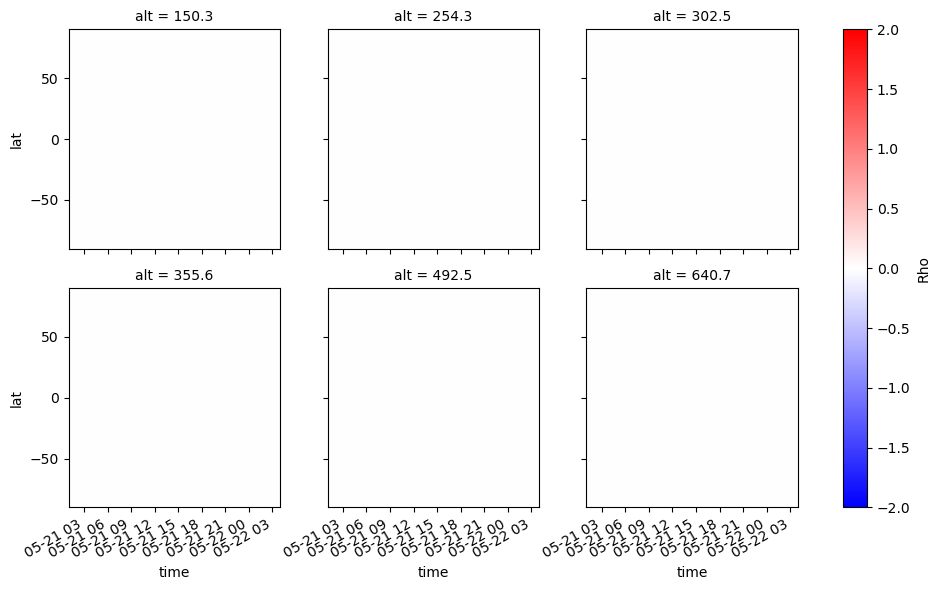

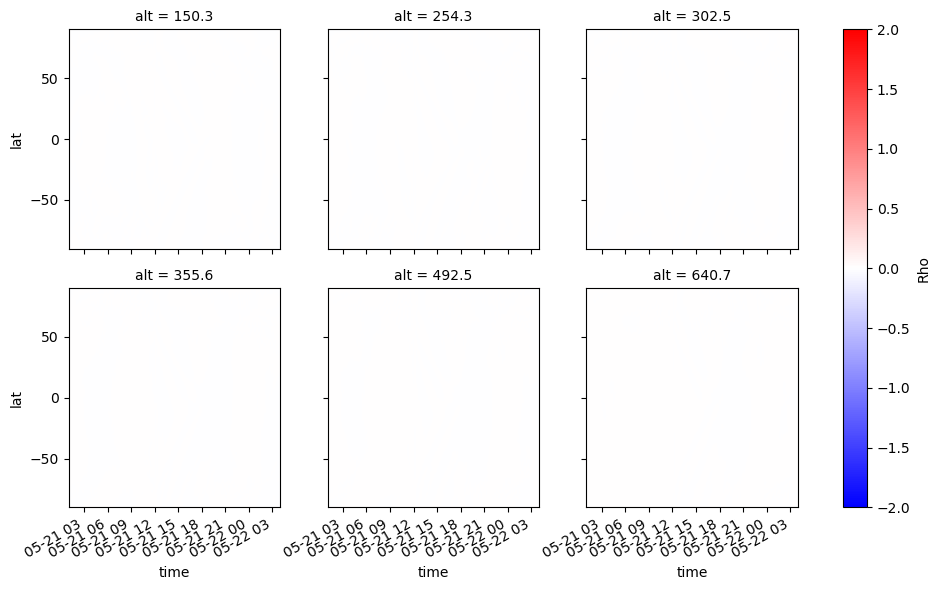

In [188]:
plotting_routines.panel_plot(
    filters.filter_xarray_DA_diff(gitms['may-full'].Rho.sel(lon=298.), percent=False, label='lower', order=2).isel(time=slice(300,9999)),
    wrap_col='alt',
    plot_vals=[150, 250, 300, 350, 500, 650],
    col_wrap=3,)

plotting_routines.panel_plot(
    filters.filter_xarray_DA_diff(gitms['may-half'].Rho.sel(lon=298.), percent=False, label='lower', order=2).isel(time=slice(300,9999)),
    wrap_col='alt',
    plot_vals=[150, 250, 300, 350, 500, 650],
    col_wrap=3,)

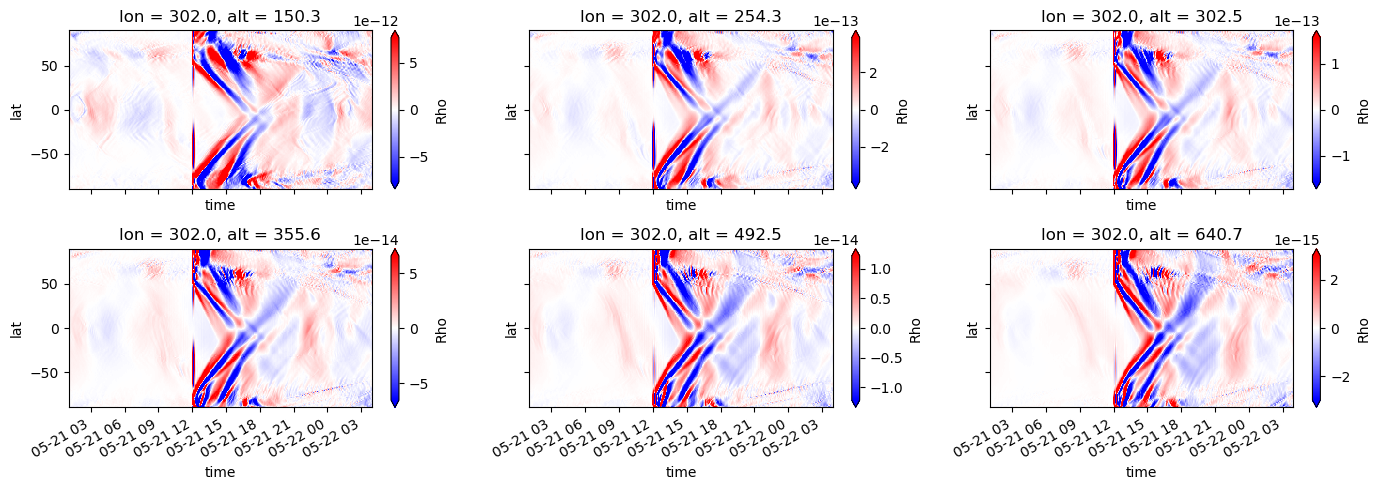

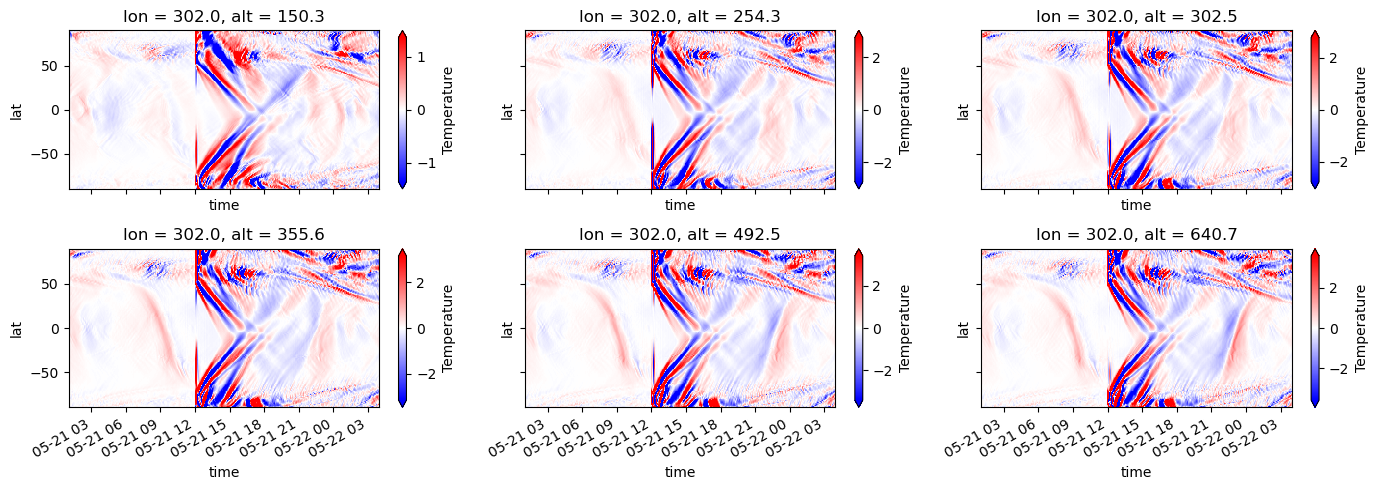

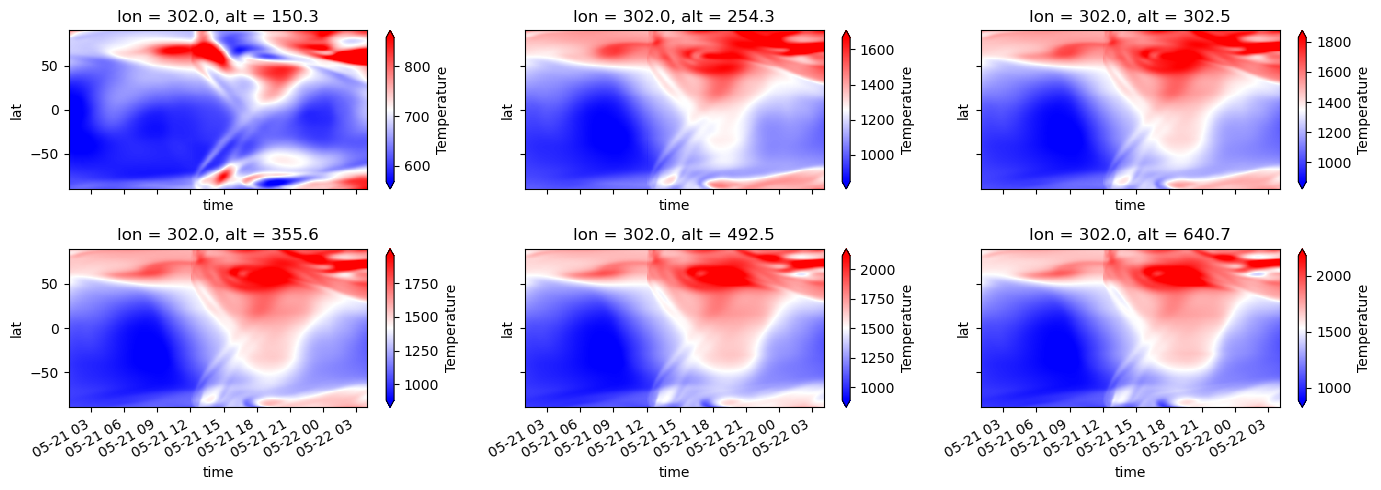

Local Time of onset (UT = 12:00): 
 7.866666666666667


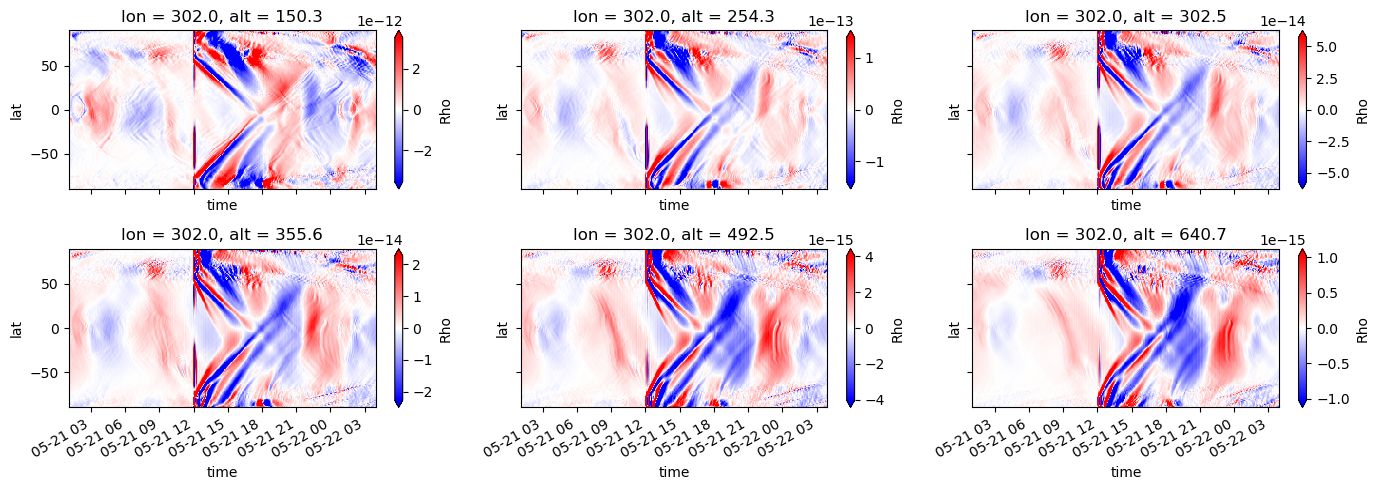

In [221]:
alts = [150, 250, 300, 350, 500, 650]

f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    filters.filter_xarray_DA_diff(gitms['may-full'].Rho.sel(lon=300, alt=alts[a], method='nearest'), percent=False, label='lower', order=2).isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()
plt.close()


f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    filters.filter_xarray_DA_diff(gitms['may-full'].Temperature.sel(lon=300, alt=alts[a], method='nearest'), percent=False, label='lower', order=2).isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()
plt.close()

f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    gitms['may-full'].Temperature.sel(lon=300, alt=alts[a], method='nearest').isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()
plt.close()


print('Local Time of onset (UT = 12:00): \n', ut_to_lt([pd.Timestamp('2011-05-21 12:00:00')], 298)[0])


alts = [150, 250, 300, 350, 500, 650]

f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    filters.filter_xarray_DA_diff(gitms['may-half'].Rho.sel(lon=300, alt=alts[a], method='nearest'), percent=False, label='lower', order=2).isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()


#print('Local Time of onset (UT = 12:00): \n', ut_to_lt([pd.Timestamp('2011-05-21 12:00:00')], 298)[0])


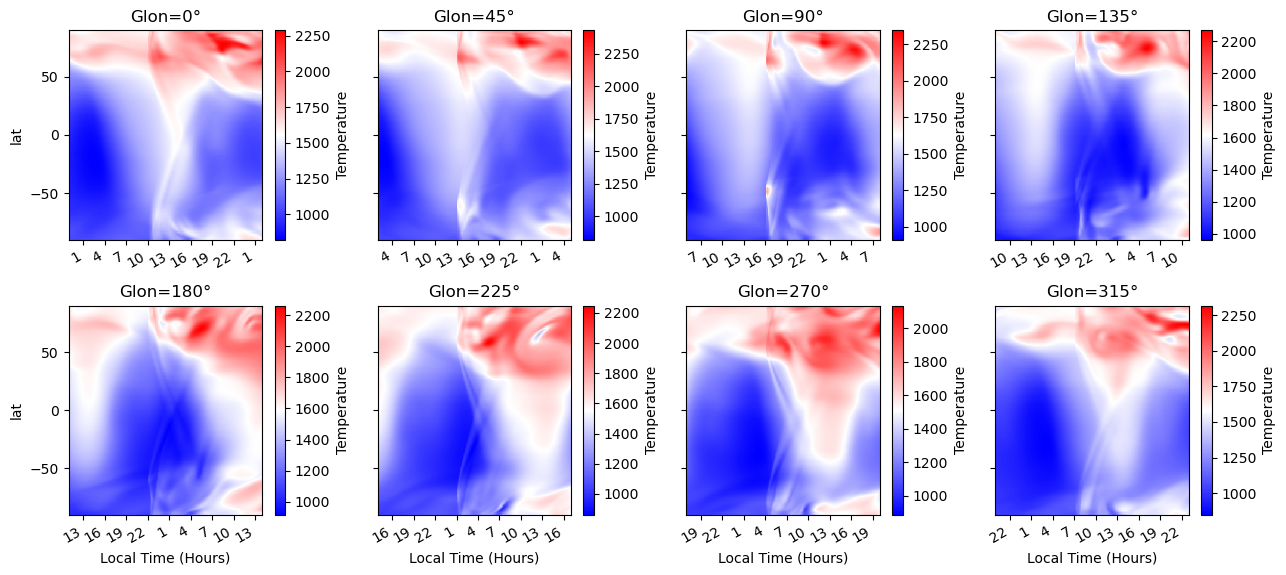

In [242]:
plotting_routines.panel_with_lt(gitms['may-full'].Temperature.sel(alt=350, method='nearest').isel(time=slice(300,9999)),
                                isel_plotvals=True,
                                tight_layout=True,)

In [235]:
ax.get_xticks()

array([15115.125, 15115.25 , 15115.375, 15115.5  , 15115.625, 15115.75 ,
       15115.875, 15116.   , 15116.125])

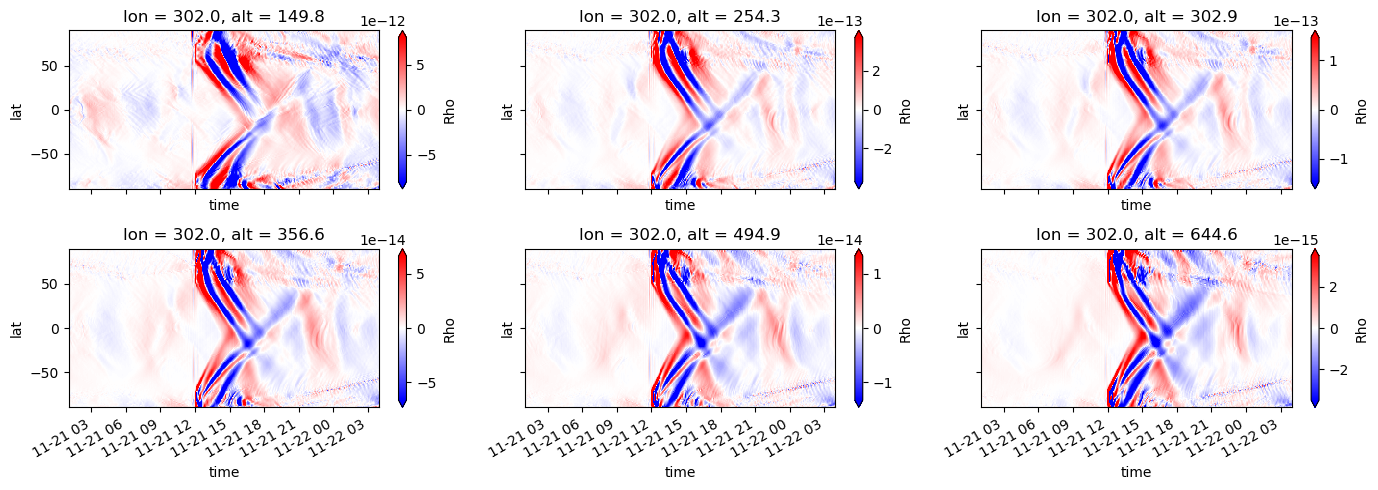

Local Time of onset (UT = 12:00): 
 7.866666666666667


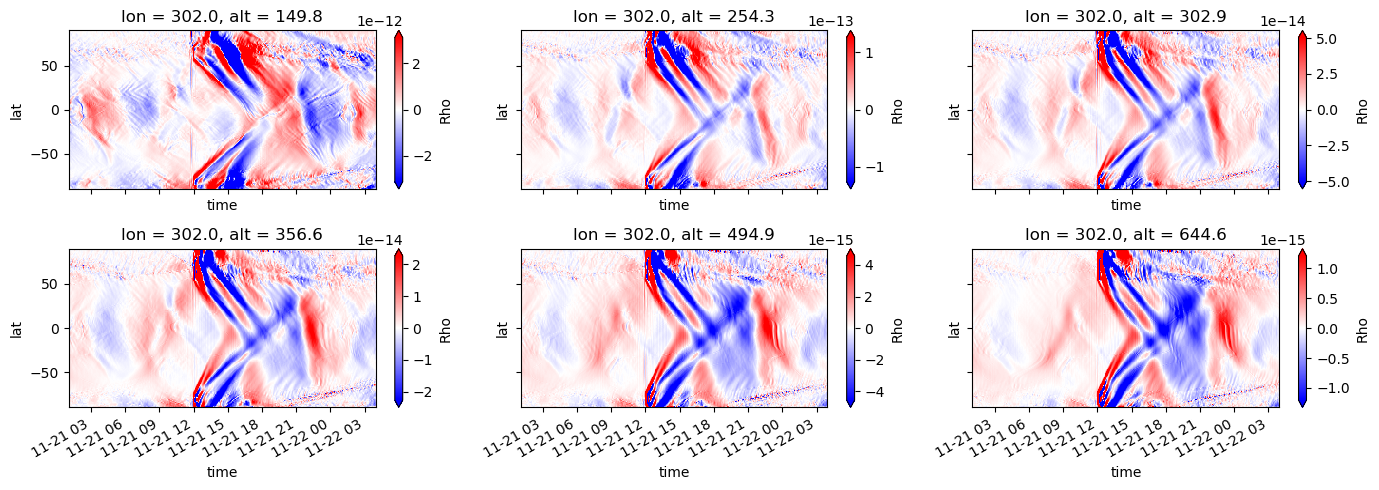

In [214]:
alts = [150, 250, 300, 350, 500, 650]

f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    filters.filter_xarray_DA_diff(gitms['nov-full'].Rho.sel(lon=300, alt=alts[a], method='nearest'), percent=False, label='lower', order=2).isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()
plt.close()

print('Local Time of onset (UT = 12:00): \n', ut_to_lt([pd.Timestamp('2011-11-21 12:00:00')], 298)[0])


alts = [150, 250, 300, 350, 500, 650]

f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    filters.filter_xarray_DA_diff(gitms['nov-half'].Rho.sel(lon=300, alt=alts[a], method='nearest'), percent=False, label='lower', order=2).isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()

In [220]:
gitms['may-full'].time.values[440]

numpy.datetime64('2011-05-21T12:40:00.093000000')

In [ ]:
times = [420, 440, 460, 480, 500]

f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    filters.filter_xarray_DA_diff(gitms['nov-full'].Rho.sel(lon=300, alt=alts[a], method='nearest'), percent=False, label='lower', order=2).isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()
plt.close()

print('Local Time of onset (UT = 12:00): \n', ut_to_lt([pd.Timestamp('2011-11-21 12:00:00')], 298)[0])


alts = [150, 250, 300, 350, 500, 650]

f, axs = plt.subplots(2, 3, figsize=(14, 5), sharex=True, sharey=True)

for a, ax in enumerate(axs.flatten()):
    filters.filter_xarray_DA_diff(gitms['nov-half'].Rho.sel(lon=300, alt=alts[a], method='nearest'), percent=False, label='lower', order=2).isel(time=slice(300,9999)).plot(x='time', ax=ax, cmap='bwr', robust=True)
    
  
    
f.tight_layout()
plt.show()

In [198]:
ax.get_title(), LT

'lon = 302.0, alt = 640.7'

In [ ]:
filters.filter_xarray_DA_diff(
                gitms[k].Rho.sel(alt=a, method='nearest'), percent=False, label='lower', order=2)

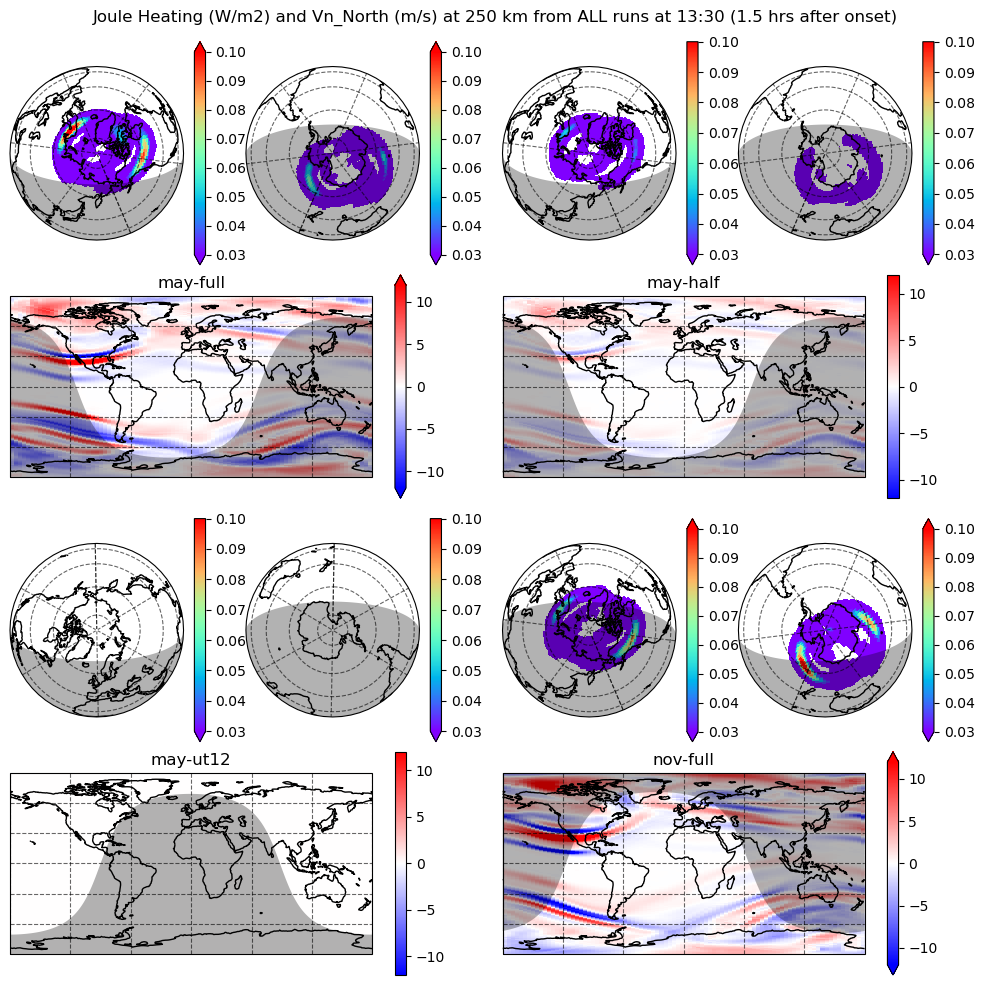

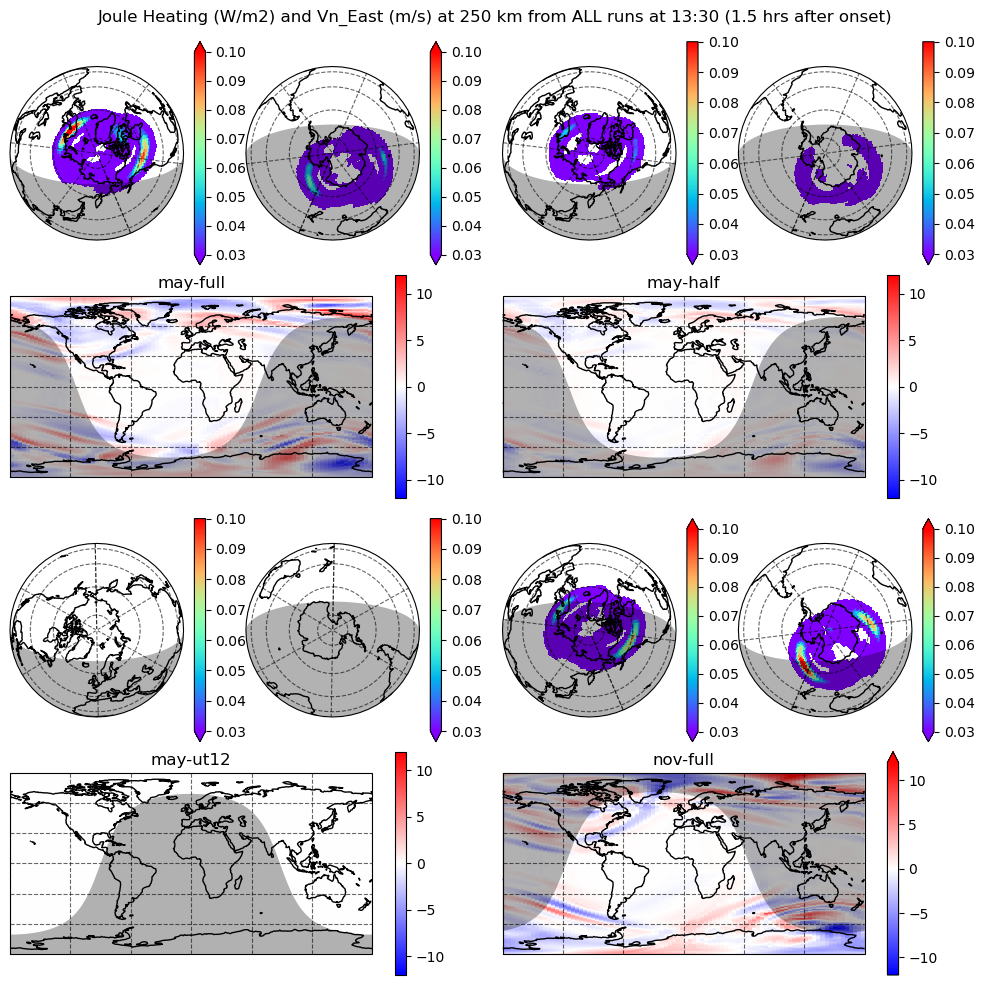

In [149]:
itime = 450
a = 250
times = []


map_data = xr.Dataset()
dial_data = xr.Dataset()
titles = []

for k in gitms.keys():
    dial_data[k] = gitms[k].AltIntJouleHeating_W_m2.isel(time=itime)#.reindex_like(gitms['may-full'], fill_value=19)
    map_data[k] = filters.filter_xarray_DA_diff(
        gitms[k].Vn_north.sel(alt=a, method='nearest'), percent=False, label='lower', order=2).isel(time=itime)#.reindex_like(gitms['may-full'], fill_value=19)
    times.append(gitms[k].time.values[itime])
    
    

fig = plotting_routines.map_and_dials(dial_da=dial_data,
                                        total=4,
                                        map_da=map_data,
                                        max_per_row=2, mask_dials=0.002,
                                        suptitle='Joule Heating (W/m2) and Vn_North (m/s) at %i km from ALL runs at 13:30 (1.5 hrs after onset)' %(a),
                                        map_cmap='bwr', vmin_dial=0.03, vmax_dial=.10, vmin_map=-12, vmax_map=12,
                                      several_datasets=True, times_datasets=times)
    
plt.show()
plt.close()





map_data = xr.Dataset()
dial_data = xr.Dataset()
titles = []

for k in gitms.keys():
    dial_data[k] = gitms[k].AltIntJouleHeating_W_m2.isel(time=itime)
    map_data[k] = filters.filter_xarray_DA_diff(
        gitms[k].Vn_east.sel(alt=a, method='nearest'), percent=False, label='lower', order=2).isel(time=itime)
    times.append(gitms[k].time.values[itime])
    

fig = plotting_routines.map_and_dials(dial_da=dial_data,
                                        total=4,
                                        map_da=map_data,
                                        max_per_row=2, mask_dials=0.002,
                                        suptitle='Joule Heating (W/m2) and Vn_East (m/s) at %i km from ALL runs at 13:30 (1.5 hrs after onset)' %(a),
                                        map_cmap='bwr', vmin_dial=0.03, vmax_dial=.10, vmin_map=-12, vmax_map=12, 
                                      several_datasets=True, times_datasets=times)
    
plt.show()
plt.close()

In [115]:
plt.close()

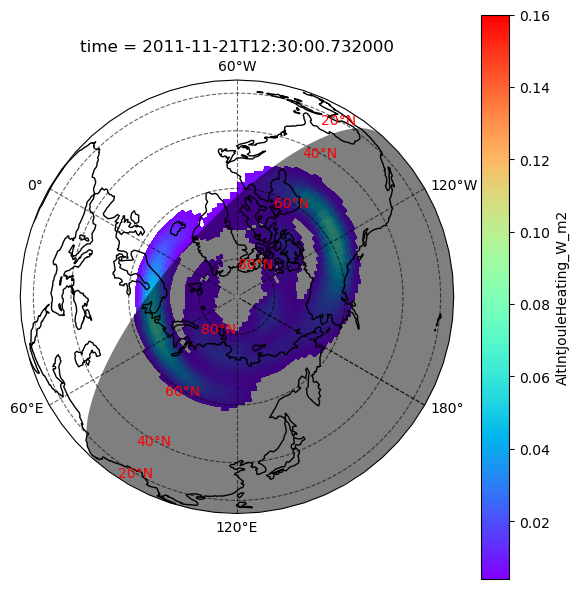

In [116]:
t = '2011-11-21 12:30'



fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection=ccrs.Orthographic(120, 90))
gitms['nov-full'].AltIntJouleHeating_W_m2.where(gitms['nov-full'].AltIntJouleHeating_W_m2 >= .004).sel(time=t, method='nearest'\
                                                                                                      ).plot(
    ax=ax, transform=ccrs.PlateCarree(), x='lon', cmap='rainbow', vmax=.16)

ax.coastlines(zorder=3, color='black', alpha=1)
ax.gridlines(color='black', linestyle='--', alpha=0.6, draw_labels=True, y_inline=True, ylabel_style={'color':'red'})
ax.add_feature(Nightshade(pd.Timestamp(t)))

ax.grid()

fig.tight_layout()

plt.show()

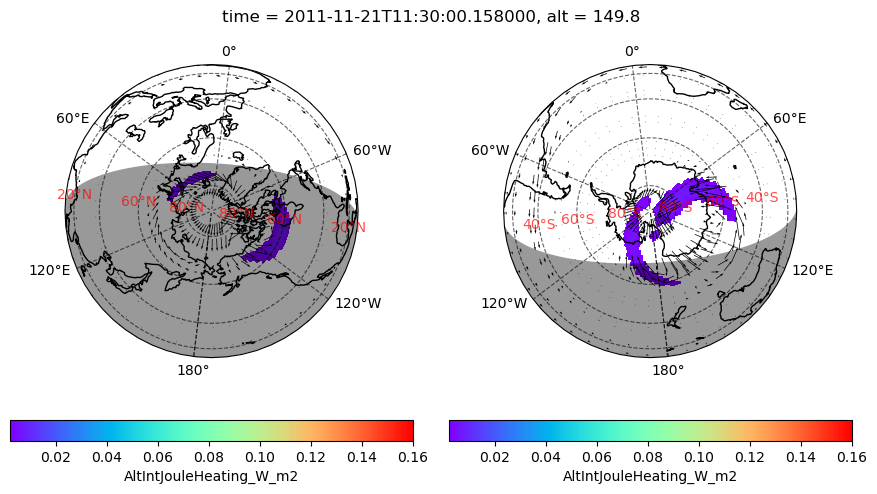

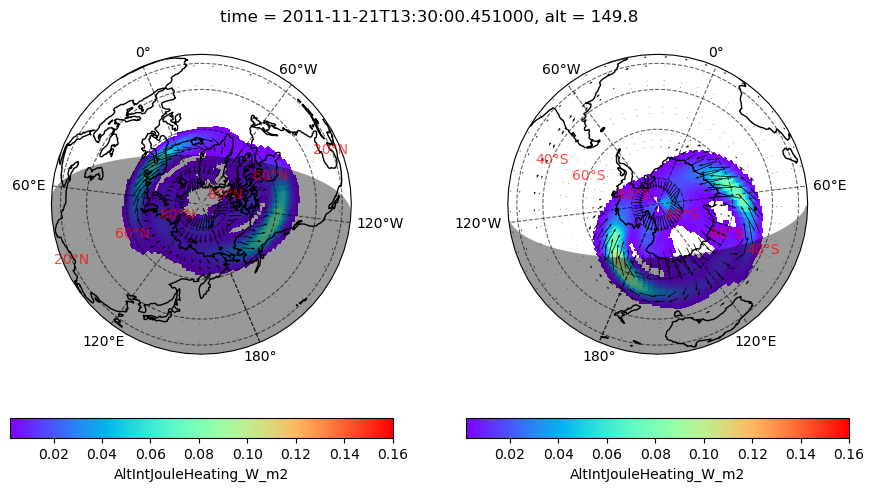

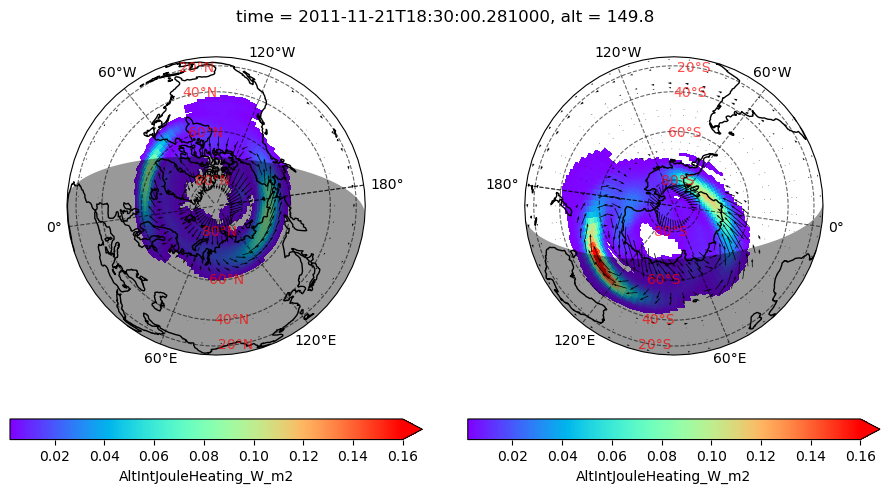

In [146]:
ts = ['2011-11-21 11:30', '2011-11-21 13:30', '2011-11-21 18:30']

v_alt = 150

locs = [[0, 90],
        [-180, -90]]

axs = []


for t in ts:
    fig = plt.figure(figsize=(9,5))

    for i in range(len(locs)):
        lons = np.arange(0, 360)
        lts = ut_to_lt([pd.Timestamp(t)], lons)
        central_lon = lons[np.argmin(np.abs(24-lts))]
        ax = fig.add_subplot(1, 2, i+1, projection=ccrs.Orthographic(central_lon+locs[i][0], locs[i][1]),)
        gitms['nov-full'].AltIntJouleHeating_W_m2.where(gitms['nov-full'].AltIntJouleHeating_W_m2 >= .002).sel(time=t, method='nearest'\
                                                                                                              ).plot(
            ax=ax, transform=ccrs.PlateCarree(), x='lon', cmap='rainbow', vmax=.16, cbar_kwargs={'location':'bottom'})



        # vx = gitms['nov-full'].Vi_east.sel(time=t, alt = v_alt, method='nearest')
        # vy = gitms['nov-full'].Vi_north.sel(time=t, alt = v_alt, method='nearest')

        # vt = (vx**2 + vy**2)**(1/2)

        gitms['nov-full'].sel(time=t, alt = v_alt, method='nearest').coarsen(lat=3, lon=2,).mean().where(np.abs(gitms['nov-full'].lat) <84).plot.quiver(
            x='lon', y='lat', u='Vi_east', v='Vi_north', ax=ax, transform=ccrs.PlateCarree(), add_guide=False)



        ax.coastlines(zorder=3, color='black', alpha=1)
        ax.gridlines(color='black', linestyle='--', alpha=0.6, draw_labels=True, y_inline=True, ylabel_style={'color':'red','alpha':0.7})
        ax.add_feature(Nightshade(pd.Timestamp(t)), alpha=0.4)


        ax.grid()

        axs.append(ax)

    fig.suptitle(ax.title.get_text())

    for ax in axs:
        ax.set_title('')


    fig.tight_layout()

    plt.show()

In [104]:
axs[-1]

<GeoAxes: title={'center': 'time = 2011-11-21T13:30:00.451000, alt = 149.8'}, xlabel='lon', ylabel='lat'>

In [111]:
axs[-1].title.get_text()

'time = 2011-11-21T13:30:00.451000, alt = 149.8'

In [58]:
gitms['may-full'].data_vars

Data variables:
    LocalTime                        (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    SolarZenithAngle                 (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    VerticalTEC                      (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    AltIntJouleHeating_W_m2          (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    AltIntHeatingTransfer_W_m2       (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    AltIntEuvHeating_W_m2            (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    AltIntPhotoElectronHeating_W_m2  (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    AltIntChamicalHeating_W_m2       (time, lon, lat) float64 dask.array<chunksize=(625, 90, 180), meta=np.ndarray>
    AltIntRadCooling_W_m2            (time, lon, lat) fl

In [60]:
vx = gitms['nov-full'].Vi_east
vy = gitms['nov-full'].Vi_north

vt = (vx**2 + vy**2)**(1/2)

In [11]:
np.unique(xr.decode_cf(ds).time.values)

array(['2011-05-20T00:00:00.000000000', '2011-05-21T00:00:00.000000000',
       '2011-05-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [240]:
plotting_routines = importlib.reload(plotting_routines)

/glade/u/home/abukowski/SAMI3-GITM-python/utility_programs/plotting_routines.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
